## Chaper 1
### Nonlinear and Chaotic Maps

#### 1.1 One-Dimensional Maps

Trajectories of the one-dimensional map: 

$ f(x) := \{ \frac{x/2 \,if\,x\,is\,even}{3x +1\,if\,x\,is\,odd} $

In [1]:
def f(x):
    if x % 2 == 0:
        return x/2.0
    else:
        return 3*x+1

56.00|28.00|14.00|7.00|22.00|11.00|34.00|17.00|52.00|26.00|13.00|40.00|20.00|10.00|5.00|16.00|8.00|4.00|2.00|1.00|4.00|2.00|1.00|4.00|2.00|1.00|4.00|2.00|1.00|4.00|2.00|1.00|4.00|2.00|1.00|

<IPython.core.display.Javascript object>


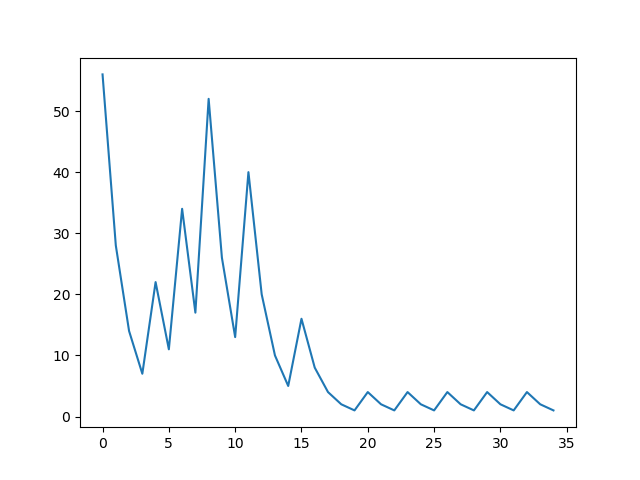

In [2]:
import matplotlib.pyplot as plt
#% matplotlib inline
%matplotlib notebook

y = 56 # first initial value
#y = 998123456789 # second initial value
T = 35 # number of iterations

xs = range(0,T)
ys = list()

for t in xs:
    if (y%2) == 0:
        ys.append(y)
        y = y / 2
    else:
        ys.append(y)
        y = 3*y +1
        
[print("%.2f" % val, end='|') for val in ys]
plt.figure()#figsize=(10,6))
plt.plot(xs,ys)

Trajectories of the logistic map: 

$ x_{t+1} =  4x_t(1-x_t) $ where $ t = 0,1,2, .. $ and $ x_0 \epsilon [0,1] $

0.33|0.89|0.40|0.96|0.17|0.56|0.99|0.06|0.22|0.68|0.87|0.44|0.98|0.06|0.22|0.70|0.85|0.52|1.00|0.00|0.02|0.06|0.24|0.73|0.79|0.66|0.90|0.37|0.93|0.25|

<IPython.core.display.Javascript object>


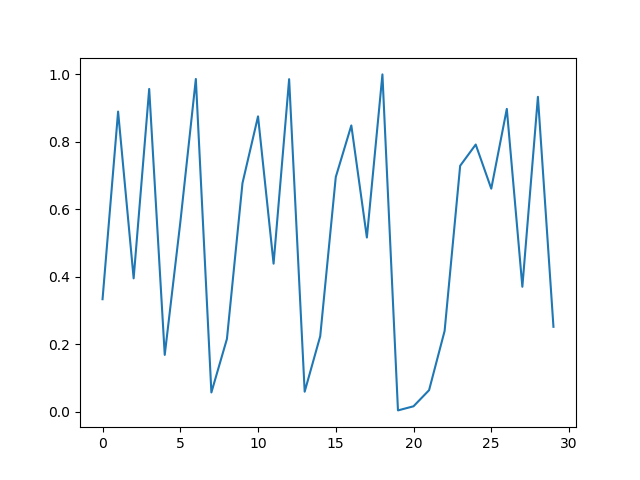

In [3]:
T = 30
y = 1.0/3.0
xs = range(0,T)
ys = list()

for t in xs:
    ys.append(y)
    y = 4*y*(1-y)
    
[print("%.2f" % val, end='|') for val in ys]
plt.figure()#figsize=(10,6))
plt.plot(xs,ys)

Trajectories of the Bernoulli map: 

$ x_{t} =  2x \, mod \, 1 $ where $ x_0 $ is the initial value

0.06|0.12|0.24|0.47|0.94|0.88|0.76|0.53|0.06|0.12|

<IPython.core.display.Javascript object>


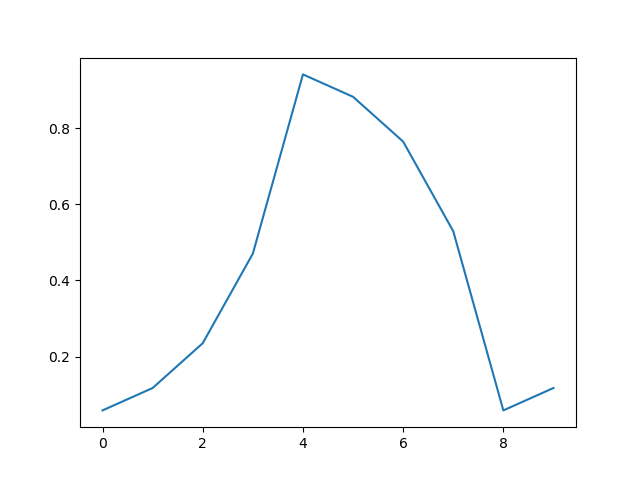

In [4]:
T = 10
y = 1.0/17.0
xs = range(0,T)
ys = list()

for t in xs:
    if y < 0.5 :
        ys.append(y)
        y = 2*y
    else:
        ys.append(y)
        y = 2*y - 1
    
[print("%.2f" % val, end='|') for val in ys]
plt.figure()#figsize=(10,6))
plt.plot(xs,ys)

#### 1.1.8 Logistic Map and Liapunov Exponent
The Lyapunov exponent quantifies this rate of divergence of a dynamical system. How non-predictable is the system in the sense that, how strongly will it collapse into chaotic behavior.

We consider the logistic map

$$ x_{t+x} = rx_t(1 - x_t) $$

where $ t = 0,1,2, $ $ x_0 \, \epsilon \, [0,1] $ and  $ r \, \epsilon \, [3,4] $. Here $r$ is the bifurcation parameter.
Thus the Liapunov exponent depends on $r$. We evaluate the Liapunov exponent for $r \epsilon [3,4]$. The derivative is given by

$$ y_{t+1} = r(1 - 2x_t)y_t. $$

The Liapunov exponent is defined as

$$ \lambda(x_0,y_0):= \lim_{T\to\infty} \frac{1}{T} ln \lvert\frac{y_T}{y_0}\lvert$$

The point $r = 3$ is a bifurcation point. The Liapunov exponent is given by $ \lambda = 0 $. In the range 3 < r < 3.5699 we find periodic solutions. 

In [11]:
import math

T = 100000
x = 0.618
e = 0.005
xe= x - e
r = 3
sumd = 0
ys = list()

while r < 4:
    for t in range(0,T):
        x1 = x
        xe1 = xe
        x = r*x1*(1-x1)
        xe = r*xe1*(1-xe1)
        dist = abs(x - xe)
        sumd +=  math.log(dist/e)
        xe = x - e
    lambd = sumd / T
    ys.append(lambd)
    sumd = 0
    r += 0.001
    


<IPython.core.display.Javascript object>


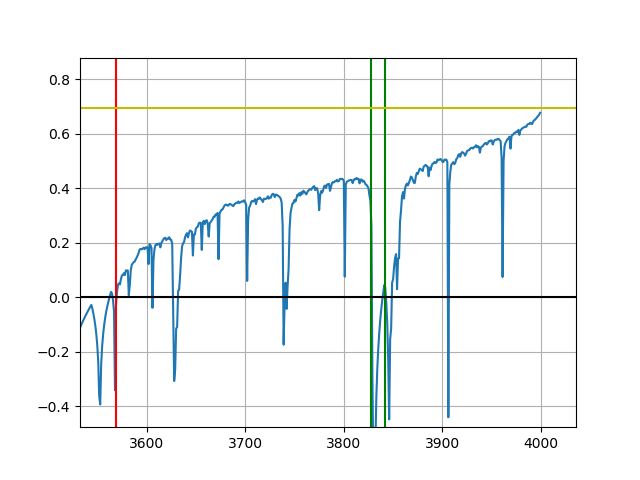

In [15]:
#[print("%.2f" % val, end='|') for val in ys]
plt.figure()#figsize=(10,8))
plt.plot(range(3000,4000),ys[0:1000])
plt.axvline(x=3569, color='r')
plt.axvline(x=3828, color='g')
plt.axvline(x=3842, color='g')
plt.axhline(y=0, color='black')
plt.axhline(y=math.log(2), color='y')
plt.grid(True)